In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Datos de Diabetes
datos_diabetes = pd.read_csv('/home/juan/machineLearning2025/datasets/diabetes_012_health_indicators_BRFSS2015.csv')

datos_diabetes

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


Información de los datos:
Dataset de origen de origen:

El Sistema de VIgilancia de Factores de Riesgo en el Comportamiento (BRFSS) se encarga de realizar encuestas telefónicas relacionadas con la salud de los residentes de EE.UU., relativos a sus comportamientos de riesgos para su salud, como lo son enfermedades crónicas, hábitos de preveención de enfermedades y uso de servicios de salud. 

https://www.cdc.gov/brfss/annual_data/annual_data.htm


El dataset usado para este proyecto toma deatos de la fuente anterior, especificamente del 2015, y selecciona 22 caracteristicas para estudiar la diabetes en los residentes de EE.UU.

https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset


Dataset desbalanceado. 22 variables. Variaable predictora: diabetes.

Diabetes_012 -> 0 no diabetes, 1 prediabetes, 2 diabetes. Varliable Categórica.

HighBP-> Hipertension. Variable Boolena.

HighChol -> COlesterol alto. Variable Booleana.

CholCheck-> Chequeo de colesterol los ultimos 5 años. Variable Booleana.

BMI -> Indice de masa corporal. Variable discreta.

Smoker ->Ha fumado al menos 100 cigarrros en su vida. Variable booleana.

Stroke -> Derrame cerebral. Variable booleana.

HeartDiseaseorAttack -> infarto coronario o infarto al miocardio. Variable booleana.

PhysActivity -> Actividad fisica los ultimos 30 dias. Variable booleana.

Fruits -> Consume al menos 1 fruta al dia. Variable booleana.

Veggies -> Consume vegetales al menos 1 vez al dia. Variable booleana.

HvyAlcoholConsump -> Hombres que toman mas de 14 bebidas alcoholicas por semana, mujeres mas de 7. Variable booleana.

AnyHealthcare-> Tiene algun seguro médico. Variable booleana.

NoDocbcCost-> En el ultimo año, no visito a un doctor debido a no poder costear los servicios médicos. Variable booleana.

GenHlth -> Opinion de salud general, tu salud general es? Escala 1-5. Variable categórica.

MentHlth -> Por cuantos dias durante el ultimo mes (1-30) no tuviste una salud buena?. Variable categórica. 

PhysHlth -> Por cuantos dias durante el ultimo mes (1-30) tu salud no fue buena?. Variable categórica.

DiffWalk -> TIenes dificultades para caminar o subir escaleras?. Variable booleana.

Sex -> 0=Femenino, 1= Masculino. Variable boolena.

Age ->  escala del 1-13, 1= 18-24, 9=60-64, 13=80 o mayores. Variable categórica.

Education -> escala del 1-6, 1=nunca fue a la escuela o solo kinder, 2=grados 1-8, 3= grados 9-11, 4= grado 12 o graduados de HIgh school, 5= 1-3 de universidad, 6= 4 o mas a;os de universidad. Variable categórica.

Income -> escala 1-8 1= menos de 10,000, 5= menos de 35,000, 8=75,000 o más. Variable categórica.


In [3]:
#Unificar prediabetes y diabetes.

datos_diabetes['Diabetes_012'] = datos_diabetes['Diabetes_012'].replace(2,1)

datos_diabetes = datos_diabetes.rename(columns={'Diabetes_012':'diabetes'})

In [4]:
# mostrar información del DataFrame
def info(df):
    print('Duplicated: ',df.duplicated().sum())
    print('Null values %:')
    print(100*df.isnull().sum()/len(df))

info(datos_diabetes)

Duplicated:  23968
Null values %:
diabetes                0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64


In [5]:
#Borrar datos duplicados.
datos_diabetes.drop_duplicates(inplace=True)

datos_diabetes.dtypes

diabetes                float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [6]:
#Definicion de datos enteros.
#datos_diabetes[['diabetes', 'GenHlth', 'MentHlth', 'PhysHlth', 'BMI', 'Age', 'Education', 'Income' ]] = datos_diabetes[['diabetes', 'GenHlth', 'MentHlth', 'PhysHlth', 'BMI', 'Age', 'Education', 'Income']].astype(int)

#Definicion de datos enteros.
for col in datos_diabetes.columns:
    #if datos_diabetes[col].dtype == 'float64':
    datos_diabetes[col] = datos_diabetes[col].astype(int)


#Ver balanceo de la clase objetivo
porcentaje = 100*datos_diabetes['diabetes'].value_counts()/len(datos_diabetes)
print(porcentaje.astype(str) + '%')

diabetes
0    82.73620881799819%
1    17.26379118200181%
Name: count, dtype: object


In [7]:
datos_diabetes.describe()

,diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,...,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000,229712.000000
mean,0.172638,0.454378,0.441697,0.959523,28.685711,0.465687,0.044765,0.103216,0.733283,0.612907,...,0.946059,0.092838,2.601205,3.506425,4.676425,0.185558,0.439141,8.085982,4.980388,5.889980
std,0.377935,0.497915,0.496590,0.197075,6.787118,0.498822,0.206787,0.304242,0.442244,0.487086,...,0.225903,0.290206,1.064778,7.714644,9.047423,0.388751,0.496283,3.093975,0.992922,2.092546
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


/tmp/ipykernel_17790/973038099.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Femenino', 'Masculino'])


[Text(0, 0, 'Femenino'), Text(1, 0, 'Masculino')]

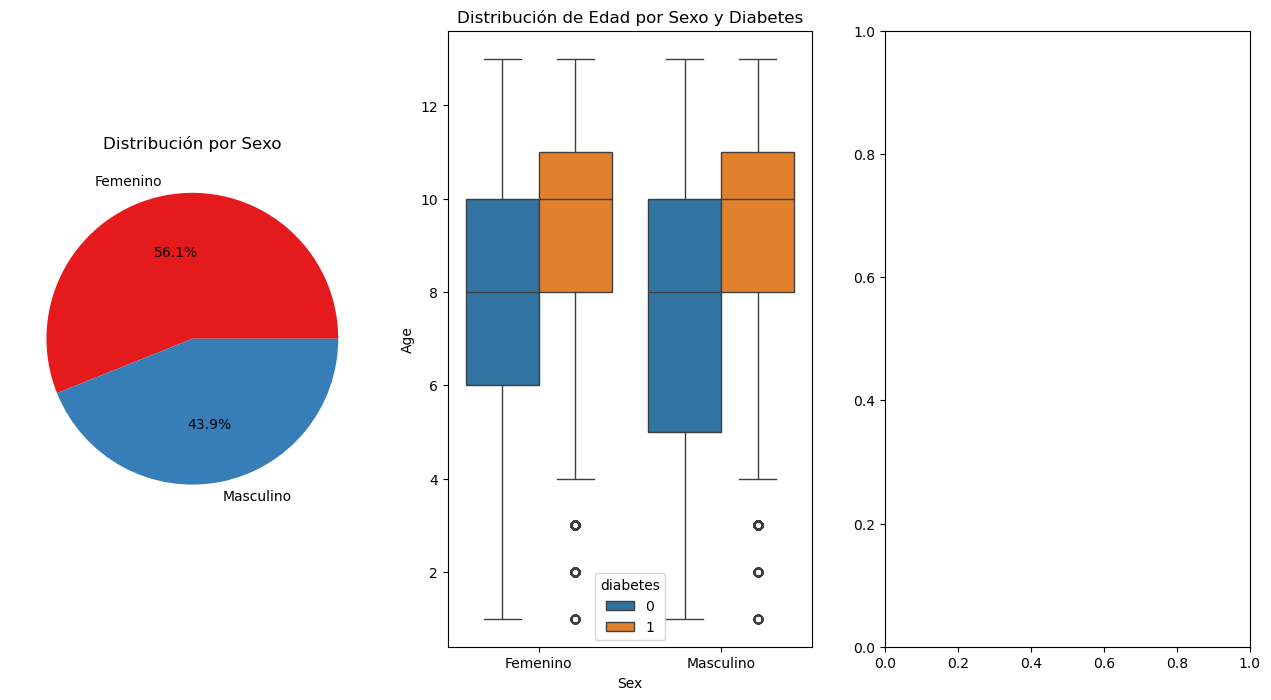

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

sexo_counts = datos_diabetes['Sex'].value_counts()
sexo_labels = {1: "Masculino", 0: "Femenino"}
sexo_counts.index = sexo_counts.index.map(sexo_labels)

axes[0].pie(sexo_counts, labels=sexo_counts.index, autopct='%1.1f%%', 
            colors=sns.color_palette('Set1', len(sexo_counts)))
axes[0].set_title('Distribución por Sexo')

#Gráficas de cajas
sns.boxplot(data=datos_diabetes, x='Sex', y='Age', hue='diabetes', ax=axes[1])
axes[1].set_title('Distribución de Edad por Sexo y Diabetes')
axes[1].set_xticklabels(['Femenino', 'Masculino'])

#plt.figure(figsize=(6,6))
#plt.pie(sexo_counts, labels=sexo_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set1", len(sexo_counts)))
#plt.title('Distribución por Sexo')
#plt.show()

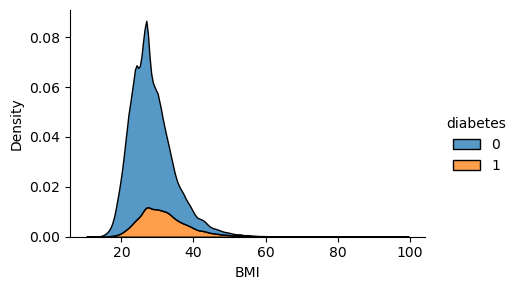

In [37]:
sns.displot(datos_diabetes, x="BMI", hue="diabetes", kind="kde", height=3, aspect=1.5, multiple="stack") 

<Axes: >

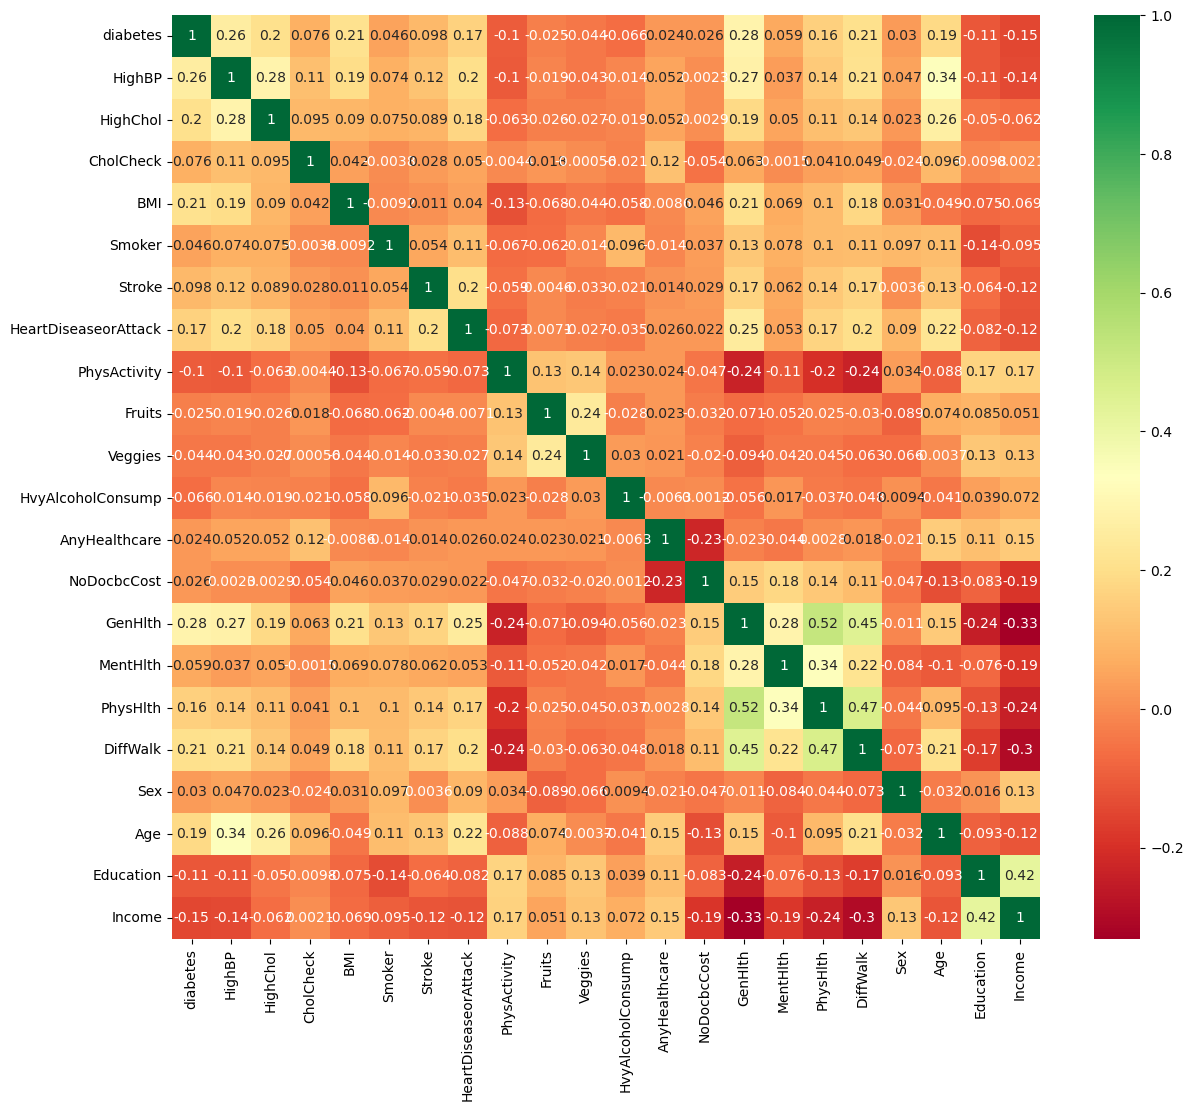

In [9]:

correlacion = datos_diabetes.corr()

correlacion
plt.figure(figsize=(14, 12)) 
sns.heatmap(correlacion, annot=True, cbar=True, cmap="RdYlGn")

<Axes: >

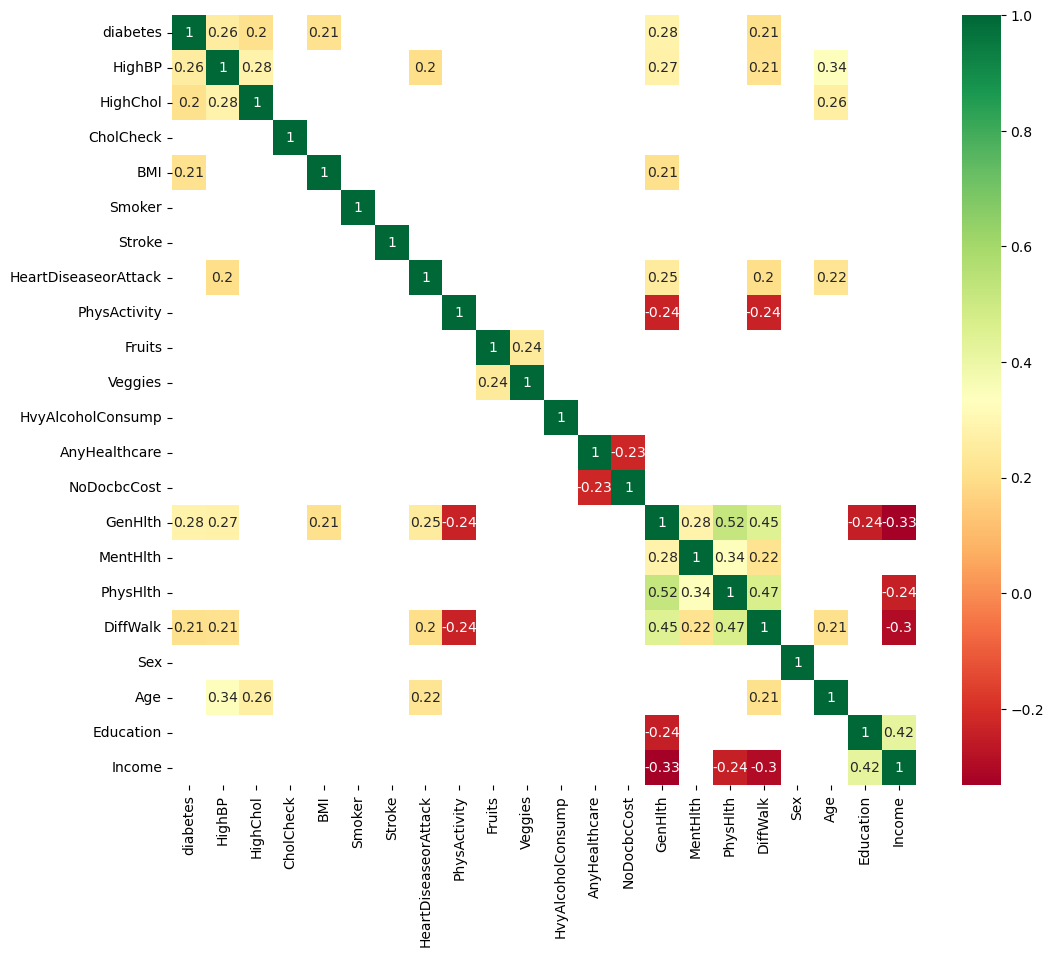

In [10]:

rango_a = 0.2
rango_b = -0.2

# Aplicar filtro
filtro = (correlacion >= rango_a) | (correlacion <= rango_b)
correlacion_filtrada = correlacion.where(filtro)

# matriz de correlación filtrada
plt.figure(figsize=(12, 10)) 
sns.heatmap(correlacion_filtrada, annot=True, cbar=True, cmap="RdYlGn")

Variables más correlacionadas ($correlacion > \left|0.3\right| $):

*PhysHlth y  GenHlth: 0.52

*PhysHlth y MentHlth: 0.34

*PhysHlth y DiffWalk: 0.47

*GenHlth y DiffWalk: 0.45

*Income y Education: 0.42

*Income y GenHlth: -0.33

*Income y DiffWalk: -0.3

*Age vs HighBP: 0.34


In [11]:
#Ordenamos el valor absoluto del coeficiente de correlacion de diabetes con las variables predictoras, para ver las mas coorelacionadas.
#abs(correlacion['diabetes']).sort_values(ascending=False)
print("Correlación de diabetes VS las demas varialbles, Ordenadas por su valor absoulo.")
correlacion['diabetes'].sort_values(ascending=False)


Correlación de diabetes VS las demas varialbles, Ordenadas por su valor absoulo.


diabetes                1.000000
GenHlth                 0.282661
HighBP                  0.260295
BMI                     0.211328
DiffWalk                0.208574
HighChol                0.204321
Age                     0.185205
HeartDiseaseorAttack    0.167333
PhysHlth                0.159122
Stroke                  0.097857
CholCheck               0.076110
MentHlth                0.059169
Smoker                  0.046420
Sex                     0.030428
NoDocbcCost             0.026169
AnyHealthcare           0.023616
Fruits                 -0.025257
Veggies                -0.043659
HvyAlcoholConsump      -0.065992
PhysActivity           -0.102825
Education              -0.108992
Income                 -0.148354
Name: diabetes, dtype: float64

#Histogramas de las variables mas correlacionadas:

(array([5.4800e+02, 2.0047e+04, 5.6178e+04, 8.1520e+04, 3.7246e+04,
        2.0457e+04, 7.0350e+03, 3.7180e+03, 1.2560e+03, 7.1400e+02,
        2.2300e+02, 1.3300e+02, 5.3000e+01, 1.7800e+02, 1.2500e+02,
        1.3400e+02, 6.5000e+01, 6.2000e+01, 2.0000e+01]),
 array([12.        , 16.52631579, 21.05263158, 25.57894737, 30.10526316,
        34.63157895, 39.15789474, 43.68421053, 48.21052632, 52.73684211,
        57.26315789, 61.78947368, 66.31578947, 70.84210526, 75.36842105,
        79.89473684, 84.42105263, 88.94736842, 93.47368421, 98.        ]),
 <BarContainer object of 19 artists>)

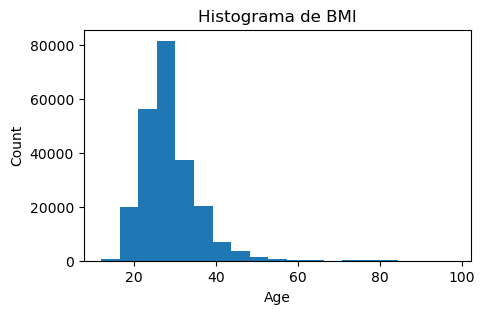

In [17]:
#Histograma BMI
#verificar que coeficiente de correlacion usa cuando tengo variables binarias

columnas_mas_correlacionadas = ['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol','Age', 'HeartDiseaseorAttack', 'PhysHlth','Income','diabetes']
subset = datos_diabetes[columnas_mas_correlacionadas] #crear el subset de columnas de la lista

##sns.pairplot(subset, hue='diabetes')
k = int(np.ceil(1+np.log2(len(subset)))) #regla de sturges con un numero entero
plt.figure(figsize=(5, 3))

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histograma de BMI')

plt.hist(subset['BMI'], bins=k)



In [13]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229712 entries, 0 to 253679
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   GenHlth               229712 non-null  int64
 1   HighBP                229712 non-null  int64
 2   BMI                   229712 non-null  int64
 3   DiffWalk              229712 non-null  int64
 4   HighChol              229712 non-null  int64
 5   Age                   229712 non-null  int64
 6   HeartDiseaseorAttack  229712 non-null  int64
 7   PhysHlth              229712 non-null  int64
 8   Income                229712 non-null  int64
 9   diabetes              229712 non-null  int64
dtypes: int64(10)
memory usage: 19.3 MB


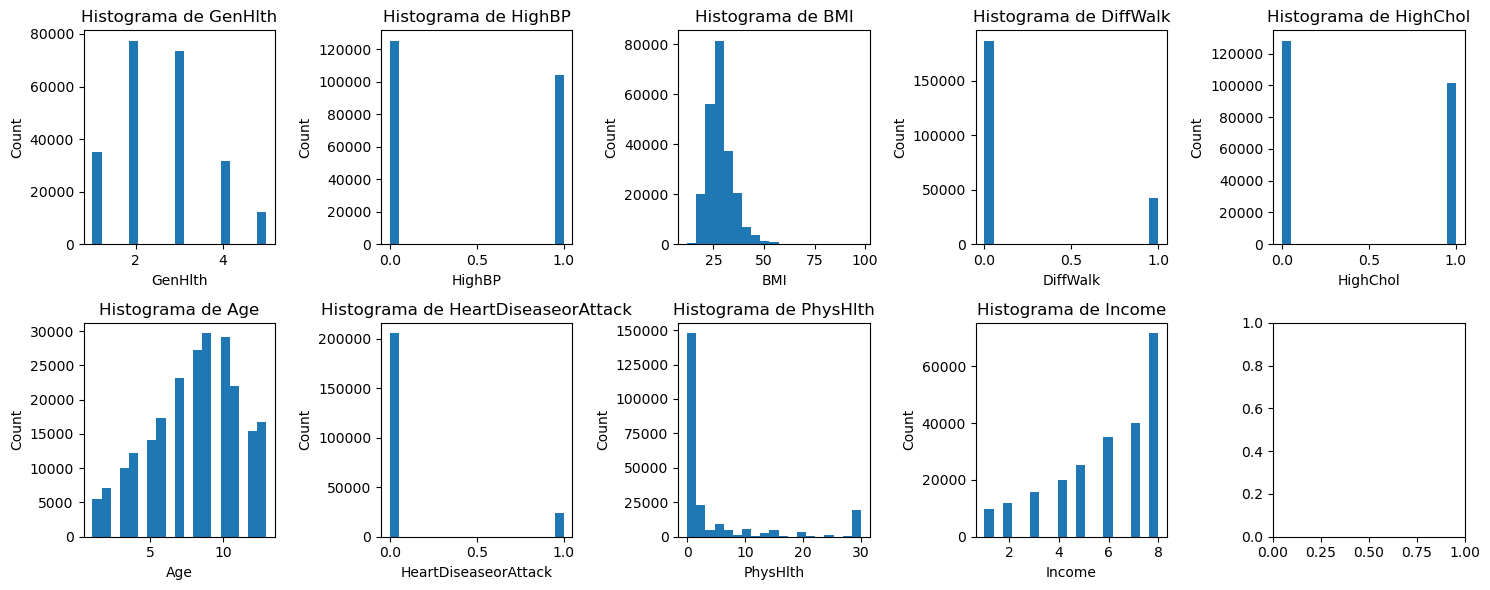

In [14]:
columnas_para_histograma = ['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol', 'Age', 'HeartDiseaseorAttack', 'PhysHlth','Income']

num_filas = 2
num_columnas = (len(columnas_para_histograma) + 1) // num_filas  # Calcula el número de columnas necesarias
fig, axes = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(15, 6))

# Aplanar el array de ejes para iterar fácilmente
axes = axes.flatten()

for i, col in enumerate(columnas_para_histograma):
    # Convierte a enteros si la columna es booleana
    
    data = subset[col].astype(int)
    
    k = int(np.ceil(1 + np.log2(len(data))))  # Regla de Sturges
    axes[i].hist(data, bins=k)
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

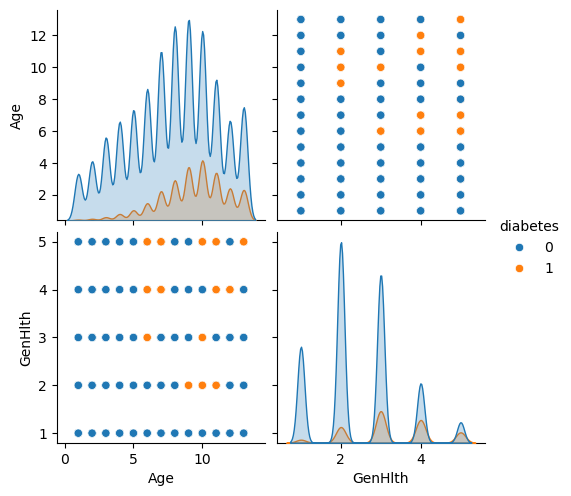

In [15]:
subset = subset[['Age', 'GenHlth','diabetes']]
sns.pairplot(subset, hue='diabetes')

In [16]:
from fitter import Fitter
import fitter
import easydev


# 80 distribuciones
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic', ]
# Atributo
fitter = Fitter(subset.BMI, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)


AttributeError: 'DataFrame' object has no attribute 'BMI'